In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def k_armed_bandit(k, epsilon, epochs):
    q_star = np.random.normal(loc=0.0, scale=1.0, size=(k,))
    rewards = np.zeros((epochs))

    R = np.zeros((k,))
    N = np.ones((k,))

    for epoch in range(epochs):
        a = None

        if np.random.random() <= epsilon:
            a = np.random.choice(np.arange(k))
        else:
            a = np.argmax(R / N)

        r = np.random.normal(loc=q_star[a], scale=1.0)

        R[a] += r
        N[a] += 1
        rewards[epoch] = r

    return q_star, rewards

In [3]:
def sample_k_armed_bandit(k, epsilon, epochs=1000, samples=2000):
    runs = [k_armed_bandit(k, epsilon, epochs) for _ in range(samples)]
    rewards = np.array([run[1] for run in runs])
    
    return rewards.mean(axis=0)

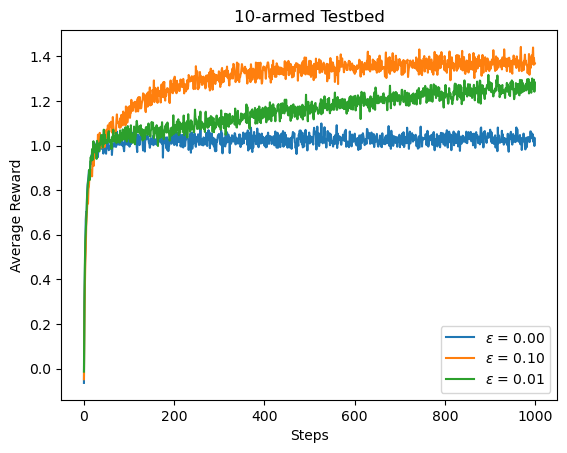

In [4]:
for epsilon in [0, 0.1, 0.01]:
    rewards = sample_k_armed_bandit(10, epsilon)

    plt.plot(rewards, label=f"$\epsilon$ = {epsilon:0.2f}")

plt.title("10-armed Testbed")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()